In [38]:
from typing import Annotated 
from typing_extensions import TypedDict 
from langgraph.graph import StateGraph , START , END 
from langgraph.graph.message import add_messages 

In [39]:
class State(TypedDict):
    messages:Annotated[list, add_messages] 

In [40]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [41]:
from langchain_groq import ChatGroq 
from langchain.chat_models import init_chat_model 
llm = ChatGroq(model = "llama3-8b-8192") 

In [42]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000018F95D65160>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000018F95D52AB0>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [43]:
llm=init_chat_model("groq:llama3-8b-8192")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000018F95D6C230>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000018F95D6E960>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [44]:
### Node 
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]} 

In [45]:
graph_builder=StateGraph(State)

## Adding node
graph_builder.add_node("llmchatbot",chatbot)
## Adding Edges
graph_builder.add_edge(START,"llmchatbot")
graph_builder.add_edge("llmchatbot",END)

## compile the graph
graph=graph_builder.compile()

In [46]:
graph_builder = StateGraph(State) 
##Add Node 
graph_builder.add_node("llmchatbot" , chatbot) 
##Add Edges 
graph_builder.add_edge(START, "llmchatbot")
graph_builder.add_edge("llmchatbot" , END) 
##compile the graph 
graph = graph_builder.compile() 

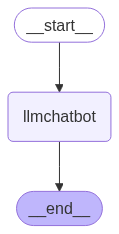

In [47]:
graph

In [48]:
response=graph.invoke({"messages":"Hi"})

In [49]:
response

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='a7ca0af7-9689-499e-8afc-829d9544a1bd'),
  AIMessage(content="Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 11, 'total_tokens': 36, 'completion_time': 0.045410753, 'prompt_time': 0.009482798, 'queue_time': 0.308730631, 'total_time': 0.054893551}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'stop', 'logprobs': None}, id='run--768076ce-4185-4505-88ba-e739e0987467-0', usage_metadata={'input_tokens': 11, 'output_tokens': 25, 'total_tokens': 36})]}

In [50]:
response["messages"][-1].content

"Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?"

In [51]:
for event in graph.stream({"messages":"Hi How are you?"}):
    for value in event.values():
        print(value["messages"][-1].content)

Hi! I'm just a language model, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to help with any questions or tasks you may have! How about you? How's your day going?


Chatbot with tool

In [52]:
from langchain_tavily import TavilySearch
tool=TavilySearch(max_results=2)
tool.invoke("What is langgraph")

{'query': 'What is langgraph',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'What is LangGraph? - IBM',
   'url': 'https://www.ibm.com/think/topics/langgraph',
   'content': 'LangGraph, created by LangChain, is an open source AI agent framework designed to build, deploy and manage complex generative AI agent workflows. At its core, LangGraph uses the power of graph-based architectures to model and manage the intricate relationships between various components of an AI agent workflow. LangGraph illuminates the processes within an AI workflow, allowing full transparency of the agent’s state. By combining these technologies with a set of APIs and tools, LangGraph provides users with a versatile platform for developing AI solutions and workflows including chatbots, state graphs and other agent-based systems. Nodes: In LangGraph, nodes represent individual components or agents within an AI workflow. LangGraph uses enhanced decision-making by modeling c

In [53]:
from langchain_tavily import TavilySearch 
tool = TavilySearch(max_results = 3) 
tool.invoke("What is Tesla?") 

{'query': 'What is Tesla?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'Electric Cars, Solar & Clean Energy | Tesla',
   'url': 'https://www.tesla.com/about',
   'content': 'About | Tesla We’re building a world powered by solar energy, running on batteries and transported by electric vehicles. Our energy generation and storage products work together with our electric vehicles to amplify their impact. Our energy generation and storage products work together with our electric vehicles to amplify their impact. Image 2: Home powered by Tesla energy products Image 4: Tesla electric vehicle Image 5: Home powered by Tesla energy products Image 7: Tesla electric vehicle After safety, our goal is to make every Tesla the most fun you could possibly have in a vehicle. After safety, our goal is to make every Tesla the most fun you could possibly have in a vehicle. The Tesla Team',
   'score': 0.37236878,
   'raw_content': None},
  {'title': 'Tesla, Inc. | 

In [54]:
##Custom functions 
def addition(a:int, b:int):
    """Add a and b
    Args:
    a(int): first int 
    b(int): second int 

    Returns:
    int: output int 
    """
    return a + b 


In [55]:
tools=[tool,addition]

In [56]:
llm_with_tool=llm.bind_tools(tools)

In [57]:
llm_with_tool

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000018F95D6C230>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000018F95D6E960>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'Search query to look up', 'type': 'string'}, 'include_domains': {'anyOf': [{'items': {'type': 'string'}, 'type': 'array'}, {'type': 'null'}], 'default': [], 'description': 'A list 

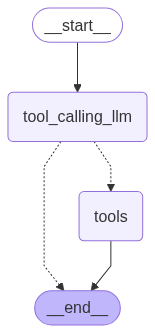

In [58]:
## Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

## Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## Grpah
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools",END)

## compile the graph
graph=builder.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [59]:
response = graph.invoke({"messages":"What is the recent or latesr news in Jaipur?"})

In [60]:
response['messages'][-1].content

'{"query": "latest news Jaipur", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.face2news.com/news/101303-agriculture-minister-meena-raids-fertilizer-warehouse-in-suratgarh.aspx", "title": "AGRICULTURE MINISTER MEENA RAIDS FERTILIZER WAREHOUSE IN SURATGARH - Face2News", "score": 0.46832922, "published_date": "Tue, 24 Jun 2025 05:02:00 GMT", "content": "• CM ISSUES STRICT DIRECTIVES TO CURB ILLEGAL MINING, CCTV SURVEILLANCE TO BE ENSURED IN MINING AREAS • WORLD WALK IMMIGRATION CONSULTANT OWNER, OTHERS BOOKED ON CHEATING 12.23 LAKH FROM GURDASPUR RESIDENT FOR NOT SENDING ABROAD • FARMERS ORGANISED A “SUBUDDHI YAGYA” AT MAHARAJA GANGA SINGH MEMORIAL NEAR GANG CANAL’S SHIVPUR HEADWORKS. • AGRICULTURE MINISTER MEENA RAIDS FERTILIZER WAREHOUSE IN SURATGARH • KAUSHIK’S TON LIFTS LEISURE ZONE • PETROL DEALERS RAISE CONCERNS OVER ALLEGED HARASSMENT [...] TANTIA DENTAL COLLEGE GRANTED RECOGNITIONHUNDRED DAUGHTERS BECOME BRAHMA KUMARISSAPTA SHAKTI COM

In [61]:
for i in response['messages']:
    i.pretty_print() 

================================ Human Message =================================

What is the recent or latesr news in Jaipur?
================================== Ai Message ==================================
Tool Calls:
  tavily_search (c0ajqr5p8)
 Call ID: c0ajqr5p8
  Args:
    query: latest news Jaipur
    search_depth: advanced
    time_range: day
    topic: news
================================= Tool Message =================================
Name: tavily_search

{"query": "latest news Jaipur", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.face2news.com/news/101303-agriculture-minister-meena-raids-fertilizer-warehouse-in-suratgarh.aspx", "title": "AGRICULTURE MINISTER MEENA RAIDS FERTILIZER WAREHOUSE IN SURATGARH - Face2News", "score": 0.46832922, "published_date": "Tue, 24 Jun 2025 05:02:00 GMT", "content": "• CM ISSUES STRICT DIRECTIVES TO CURB ILLEGAL MINING, CCTV SURVEILLANCE TO BE ENSURED IN MINING AREAS • WORLD WALK IMMIGRATION CON

In [62]:
response = graph.invoke({"messages":"What is 5 add 2"})
for i in response['messages']:
    i.pretty_print()

================================ Human Message =================================

What is 5 add 2
================================== Ai Message ==================================
Tool Calls:
  addition (jcmagshp4)
 Call ID: jcmagshp4
  Args:
    a: 5
    b: 2
================================= Tool Message =================================
Name: addition

7


In [63]:
response=graph.invoke({"messages":"Give me the recent ai news and then add 5 to 10"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

Give me the recent ai news and then add 5 to 10
================================== Ai Message ==================================
Tool Calls:
  tavily_search (59sbz0a78)
 Call ID: 59sbz0a78
  Args:
    query: recent ai news
    search_depth: advanced
    time_range: day
    topic: news
  addition (0gy89cfws)
 Call ID: 0gy89cfws
  Args:
    a: 5
    b: 10
================================= Tool Message =================================
Name: tavily_search

{"query": "recent ai news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.infosecurity-magazine.com/opinions/ai-priorities-cybersecurity-leaders/", "title": "Leading at the Speed of Algorithms: Immediate AI Priorities for Cybers - Infosecurity Magazine", "score": 0.75831425, "published_date": "Mon, 23 Jun 2025 11:00:00 GMT", "content": "### Researchers Warn of 'Living off AI' Attacks After PoC Exploits Atlassia

In LangGraph, a ReAct (Reasoning and Acting) agent architecture combines a Large Language Model (LLM) with the ability to reason, act, and observe its environment, enabling it to solve complex tasks and utilize external tools. The ReAct pattern allows the agent to dynamically adjust its approach based on new information and results from previous steps, similar to how humans solve problems. 
Here's a breakdown of the key concepts:
1. ReAct Framework: 
Reasoning:
The LLM uses its reasoning capabilities to determine the next course of action.
Acting:
The agent can call tools, such as web searches or APIs, to gather information or perform actions.
Observing:
The agent analyzes the results of its actions to refine its reasoning and determine the next step.
2. LangGraph Implementation:
Graph Structure:
LangGraph uses a graph-based structure to represent the agent's workflow. Nodes in the graph represent different states or actions, and edges represent the transitions between them. 
State Management:
The "state" feature in LangGraph acts as a memory bank, recording the agent's history and context throughout the process. 
Tool Calling:
LangGraph provides tools for integrating various tools into the agent, including prebuilt LangChain tools like Wikipedia or DuckDuckGo, or custom-built tools. 
Conditional Edges:
Edges can be conditional, allowing the agent to branch based on the results of previous steps and choose the appropriate next action. 
3. How it Works:
The agent starts with an initial input and a reasoning phase. 
The LLM generates a thought, an action, and potentially a tool call based on the input and current state. 
The agent executes the action, potentially using a tool. 
The agent observes the results and updates its state. 
The agent repeats the reasoning, acting, and observing cycle until it reaches a conclusion or a predefined stopping condition. 

ReACT Agent Architecture

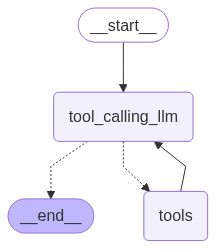

In [64]:
## Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

## Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## Grpah
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools","tool_calling_llm")

## compile the graph
graph=builder.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

Adding Memory in Agent Graph

In [65]:
response = graph.invoke({"messages":"Hello my name is Saurabh"})
for i in response['messages']:
    i.pretty_print() 

================================ Human Message =================================

Hello my name is Saurabh
================================== Ai Message ==================================

Nice to meet you, Saurabh!


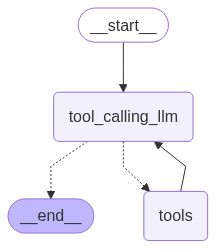

In [66]:
## Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

## Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## Grpah
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools","tool_calling_llm")

## compile the graph
graph=builder.compile(checkpointer=memory)

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [67]:
config = {"configurable":{"thread_id":"1"}} 
response = graph.invoke({"messages":"Hi my name is Saurabh"} , config = config) 
response 

{'messages': [HumanMessage(content='Hi my name is Saurabh', additional_kwargs={}, response_metadata={}, id='92204e75-8218-4806-b0ad-82da7a7a48bf'),
  AIMessage(content='Nice to meet you, Saurabh!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 2194, 'total_tokens': 2204, 'completion_time': 0.014277301, 'prompt_time': 0.295338249, 'queue_time': 0.28484948699999996, 'total_time': 0.30961555}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'stop', 'logprobs': None}, id='run--bef9cd1d-6839-4448-8dca-29308e72f5d3-0', usage_metadata={'input_tokens': 2194, 'output_tokens': 10, 'total_tokens': 2204})]}

In [68]:
response['messages'][-1].content

'Nice to meet you, Saurabh!'

In [69]:
response=graph.invoke({"messages":"Hey what is my name"},config=config)

print(response['messages'][-1].content)

Your name is Saurabh.


In [70]:
response=graph.invoke({"messages":"Hey do you remember my name"},config=config)

print(response['messages'][-1].content)

I remember, your name is Saurabh.


Streaming 

In [71]:
from langgraph.checkpoint.memory import MemorySaver 
memory = MemorySaver() 

In [72]:
def superbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}

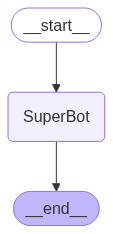

In [73]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile(checkpointer=memory)


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [74]:
## Invocation

config = {"configurable": {"thread_id": "1"}}

graph_builder.invoke({'messages':"Hi,My name is Saurabh And I like cricket"},config)

{'messages': [HumanMessage(content='Hi,My name is Saurabh And I like cricket', additional_kwargs={}, response_metadata={}, id='1874bcc7-3cb7-47c1-a293-4a219c6eeb4c'),
  AIMessage(content="Nice to meet you, Saurabh! Cricket is a fantastic sport, isn't it? Which team do you support? Are you a fan of any particular player or a specific format of the game (Test, ODI, T20)?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 50, 'prompt_tokens': 22, 'total_tokens': 72, 'completion_time': 0.048734633, 'prompt_time': 0.005914812, 'queue_time': 0.466533907, 'total_time': 0.054649445}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8dc6ecaf8e', 'finish_reason': 'stop', 'logprobs': None}, id='run--fbdda778-ecca-4993-b9cf-4eaacb7c02af-0', usage_metadata={'input_tokens': 22, 'output_tokens': 50, 'total_tokens': 72})]}

In [75]:
# Create a thread
config = {"configurable": {"thread_id": "3"}}

for chunk in graph_builder.stream({'messages':"Hi,My name is Saurabh And I like cricket"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="Nice to meet you, Saurabh! Cricket is a fantastic sport, isn't it? Who's your favorite team or player? Do you have a favorite memory or moment from a cricket match that's stuck with you?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 22, 'total_tokens': 68, 'completion_time': 0.062878763, 'prompt_time': 0.008105648, 'queue_time': 0.282184501, 'total_time': 0.070984411}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'stop', 'logprobs': None}, id='run--4f4c616d-de3a-4739-9c23-d235a1cf7dea-0', usage_metadata={'input_tokens': 22, 'output_tokens': 46, 'total_tokens': 68})]}}
